In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [2]:
def polynomial_features(X, degree):
    features = []
    for i in range(degree + 1):
        for j in range(degree + 1):
            for k in range(degree + 1):
                if  i + j + k <= degree and i+j+k!=0 :              
                    features.append((X[:,0] ** i) * (X[:,1] ** j) * (X[:,2] ** k))
    return np.vstack(features).T

In [3]:
def z_normalize(x):
    mu=np.mean(x,axis=0)
    sigma=np.std(x,axis=0)
    x_norm=(x-mu)/sigma
    return x_norm,mu,sigma

In [4]:
def compute_poly_cost(x,y,w,b,lambda_):
    m=x.shape[0]       
    err= (np.dot(x,w.T)+b-y)
    cost=np.sum(err**2)
    reg_cost=np.sum(w**2)   
    total_cost=cost/(2*m)+lambda_*(reg_cost/(2*m))     
    return total_cost

In [5]:
def compute_poly_gradient(x,y,w,b,lambda_):
    m=x.shape[0]
    #w(1,n)
    err=(np.dot(x,w.T)+b-y)  
    dj_db=np.mean(err)
    dj_dw=  (np.dot(err.T,x)  + lambda_*w)/m
    return dj_db , dj_dw

In [6]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters,lambda_):
    J_history=[]
    w=w_in
    b=b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(x,y,w,b,lambda_)        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
         
        if i <10000:
            J_history.append(cost_function(x,y,w,b,lambda_))                
        if i% np.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d} : Cost {J_history[-1]:.2f}")
            
    return w, b, J_history        

# Load Data

In [8]:
df = pd.read_csv('Polynomialdata_train.csv')
z=np.array(df.head(50000))
x=z[:,1:]
y_train=z[:,0].reshape(-1,1)
x_train=polynomial_features(x,6)
x_norm,mu,sigma=z_normalize(x_train)


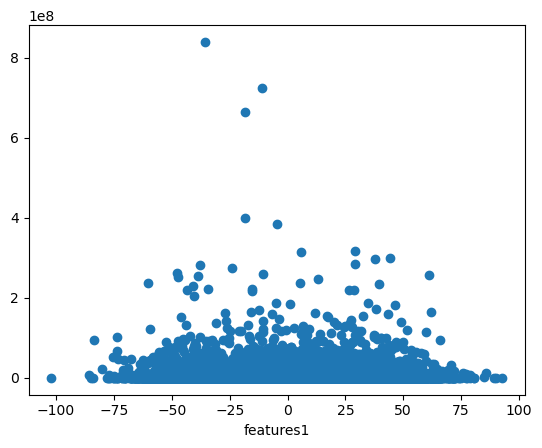

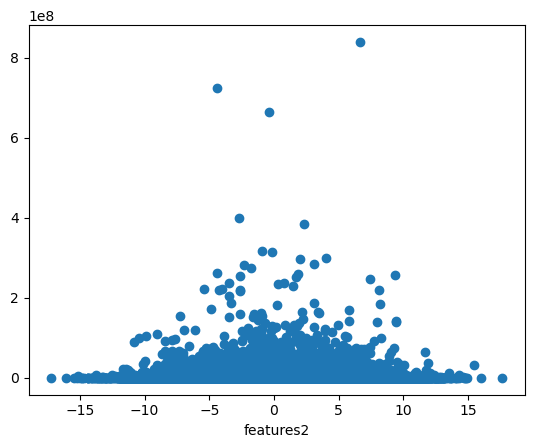

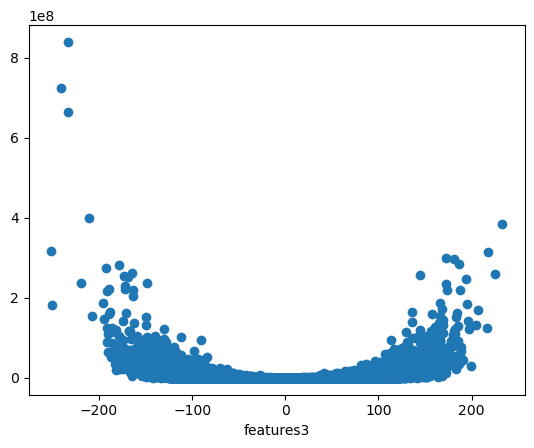

In [10]:
for i in range(x.shape[1]):
    plt.scatter(x[:,i],y_train)
    plt.xlabel(f'features{i+1}')
    plt.show()

In [11]:
initial_w=np.zeros((1,x_norm.shape[1]))
initial_b=0
lambda_=0
alpha=0.03
iterations=20000
w_final,b_final,j_hist=gradient_descent(x_norm,y_train,initial_w,initial_b,compute_poly_cost,compute_poly_gradient,
                                       alpha,iterations,lambda_)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0 : Cost 54392618789526.58
Iteration 2000 : Cost 36344208089.34
Iteration 4000 : Cost 7881034933.89
Iteration 6000 : Cost 1887411620.04
Iteration 8000 : Cost 461268415.16
Iteration 10000 : Cost 114218807.13
Iteration 12000 : Cost 114218807.13
Iteration 14000 : Cost 114218807.13
Iteration 16000 : Cost 114218807.13
Iteration 18000 : Cost 114218807.13
b,w found by gradient descent: 1773547.77,[[-2.92914803e+02 -1.69940329e+03  6.97762965e+02  2.84580153e+03
  -5.39718414e+02  8.59461222e+06  4.34794879e+01 -1.32252365e+02
  -1.30691718e+02  7.09948413e+01  1.01422859e+02  1.02312786e+06
  -6.20912360e+02 -3.59293022e+01  7.45229495e+02  1.78799769e+01
   1.01703838e+05 -5.57592072e+01  2.84641908e+02  2.93085392e+01
   8.17751158e+03  8.09836280e+02  3.45737026e+01  2.59860915e+02
   3.20716423e+01 -1.61076049e+02 -4.04210389e+02 -4.71681612e+01
  -5.70252953e+02  1.81727684e+02  8.51867120e+02 -1.88760636e+02
   6.33425660e+06  1.35893916e+02 -6.64963432e+01  8.79958539e+01


In [12]:
def predict(x,w,b):
    yp=np.dot(x,w.T)+b
    return yp

yp=predict(x_norm,w_final,b_final)

def R2_score(y,yp):
    a=np.sum((y-yp)**2)
    y_mean=np.mean(y)
    b=np.sum((y-y_mean)**2)
    R2_score=1-(a/b)
    return R2_score

R2_score(y_train,yp)

0.9999999979760448

# Graphical Representation of data 

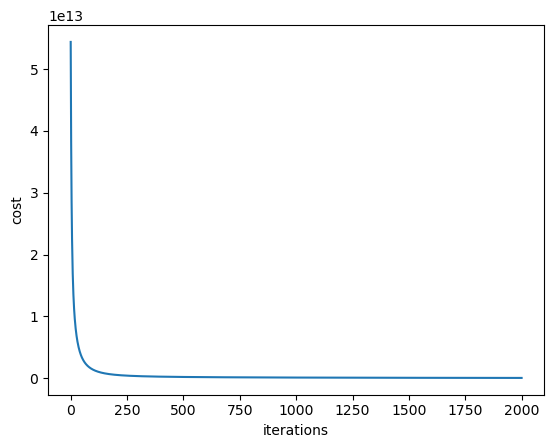

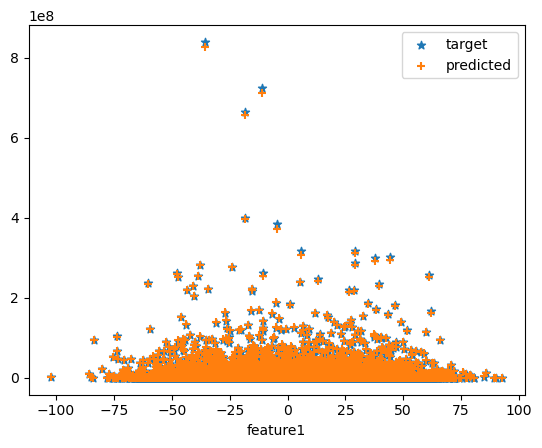

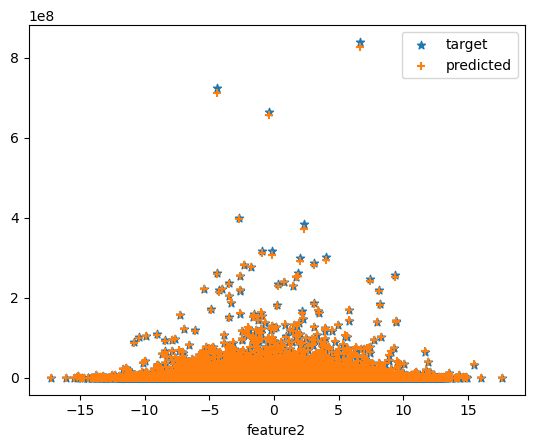

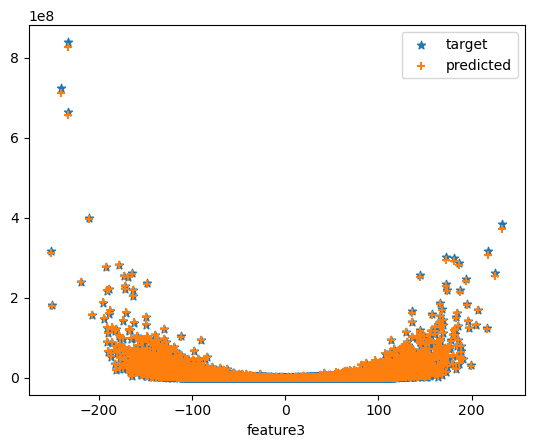

In [32]:
def iter_vs_cost(iterations,j_hist):
    plt.plot(np.arange(iterations),np.array(j_hist))
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()

iter_vs_cost(iterations,j_hist)

for i in range(x.shape[1]):
    plt.scatter(x[:,i],y_train,label='target',marker='*')
    plt.scatter(x[:,i],yp,label='predicted',marker='+')
    plt.xlabel(f'feature{i+1}')
    plt.legend()
    plt.show()

# Loading Test Data

In [39]:
td=pd.read_csv('Polynomialdata_test.csv')
td=np.array(td)
ID=td[:,0]
x_test=td[:,1:]
x_test_feat=polynomial_features(x_test,6)
x_test_norm=(x_test_feat-mu)/sigma

# Predicting y labels  

In [42]:
Y_test_pred=predict(x_test_norm,w_final,b_final)

In [48]:
result=np.c_[ID,Y_test_pred]
result=pd.DataFrame(result,columns=['ID','Y_predicted'])


result

,ID,Y_predicted
0,16588.0,319007.772110
1,17513.0,573908.869643
2,14448.0,38794.709002
3,13972.0,473980.519036
4,18321.0,200773.938264
...,...,...
9995,19691.0,-110349.933396
9996,10512.0,191291.591939
9997,17741.0,715027.432954
9998,18381.0,-183205.357703
